# Statistics for Engineers

Tuorial at SRECon 2015

by Heinrich Hartmann

## Heinrich Hartmann

* Twitter: [@HeinrichHartman](https://twitter.com/HeinrichHartman)
* Blog: [HeinrichHartmann.com](https://heinrichhartmann.com)

### Bio

* Phd in pure Mathematics (Mainz, Bonn, Oxford)

* Postdoc in IT (Koblenz)

* Freelance Consultant

* Data Scientist at Circonus.com

<img src="img/me.jpg" width="200px" style="margin-right:auto; margin-left:auto">

<img src="img/Circonus_Logo.png" style="margin-right:auto; margin-left:auto">



# Slides, Code and Data

Twitter: @HeinrichHartman

[TODO] Embed proper tweet.

<blockquote class="twitter-tweet" lang="en"><p lang="en" dir="ltr">Automated anomaly detection: A whole new way to monitor. Live at Booth 217. <a href="https://twitter.com/hashtag/chefconf?src=hash">#chefconf</a> <a href="https://twitter.com/ChefConf">@chefconf</a> <a href="https://twitter.com/circonus">@circonus</a> <a href="http://t.co/nOJrP6z1S5">pic.twitter.com/nOJrP6z1S5</a></p>&mdash; Circonus (@circonus) <a href="https://twitter.com/circonus/status/583724394222133249">April 2, 2015</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

GitHub: https://github.com/HeinrichHartmann/

# Outline

1. Summarizing Data Theory

2. Hands on Session

3. Probability Theory and Statistics

# Learning Goals / Problem Statements

* Check SLA: 95% Uptime.
  - Quantiles
  - Mean values
  - Means of mean values

* Capacity Planning
  - Forecasting, Regressions

* Evaluate Changes
  - Compare response time before and after code change
  - A/B Testing

* Handle system data on the command line
  - csv files
  - UNIX tools
  - Live Plotting
  
* Awarenes for Difficulties
  - Difference between raw and rolled up data
  - Multiple roll ups

# Summarizing Data

Given a list of numbers $X=[x_1, \dots, x_n]$ how can we _understand_ the data?

Example sources:

* CPU utilization
* Network throughput

Example summaries:

* How many points are there?
* What are typical values?
* How large is the spread of the data?
* Is the data evenly distributed or clustered?
* Are there outliers?

### Ordered data

* Example: Time dependent observations

* Questions:
  - Trends?
  - Periods?

* Visualization
  - Time series plot

... to be continued


## Time Series plot of Request Data

In [4]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)

np.random.seed(9221999)

import seaborn as sns

x= [ 789.73950195  778.48028564  820.66223145] ...
n= 76


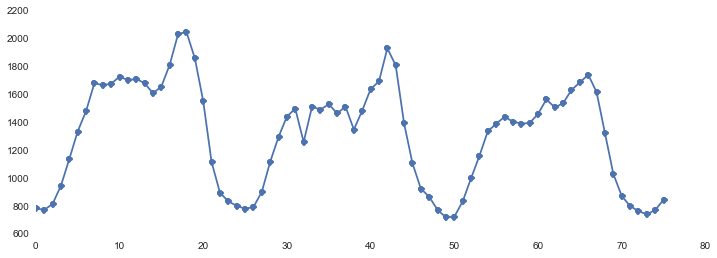

In [10]:
X = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]
print "x=", X[:3], '...'
print "n=", len(X)
plt.plot(X,'o-');

# Unordered data

* Forget about time dependence
* Requests to website (e.g. log files)


Visualization Method:
1. Rug Plot
2. Histograms
3. Kernel density estimation

## Rug Plots

* Plot a vertical line 'rug' for each data point

* Simple and accurate representation of data

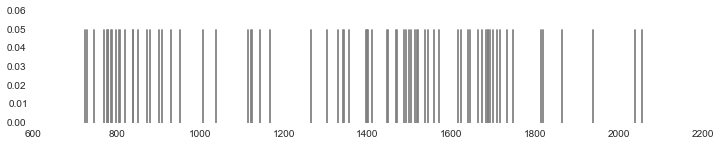

In [11]:
plt.figure(figsize=(12,2))
sns.rugplot(X, color="grey");

### From Time Series to Rug Plots
1. Project point to y-axis
2. Rotate

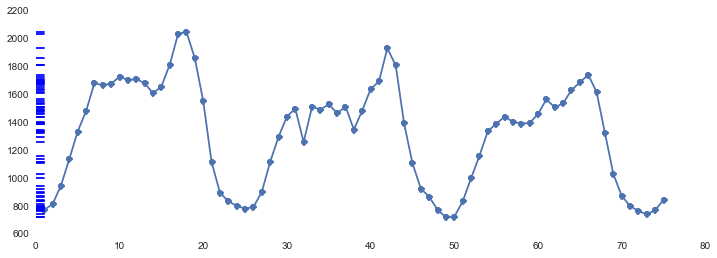

In [12]:
plt.plot(X,'o-')
sns.rugplot(X,axis='y', height=1, color="blue");

### Rug plot for discrete values is problematic

* Multiple values not visible.

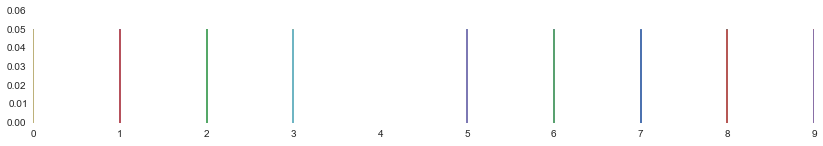

In [13]:
data_discrete = [1, 2, 1, 6, 0, 8, 0, 6, 5, 5, 9, 5, 7, 2, 9, 5, 0, 8, 8, 8, 8, 9, 3, 3 ] * 3
X = data_discrete

plt.figure(figsize=(14,2))
sns.rugplot(X);

### Jitter Trick

* Perturb each value by a random displacement.
* The displacement needs to be small in comparison to the distance between values.
* Can also use vertical displacement.

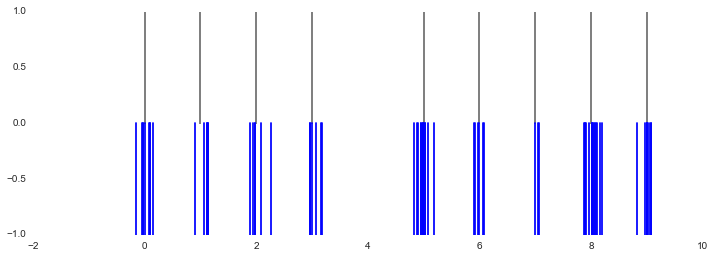

In [16]:
jitter = lambda x: [ v + 0.1 * np.random.normal() for v in x]

sns.rugplot(X, height=1, color='grey');
sns.rugplot(jitter(X), height=-1, color='blue');

## Histogram Visualization of Unordered Data

1. Divide data domain into bins. [TODO: IMAGE]
2. Count number of datapoints per bin.  [TODO: IMAGE]
3. Plot bar chart of bin frequencies. (Normalize by bin width!)

Bins:   [[0, 1], [1, 2], [2, 3]] ... [10, 11]
Counts: [9, 6, 6, 6, 0, 12, 6, 3, 15, 9, 0]


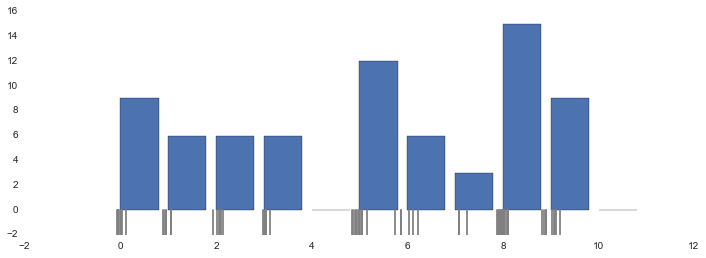

In [259]:
X = data_discrete

bins = [ [i,i+1] for i in range(11) ]
print "Bins:  ", bins[:3], "...", bins[-1]

def count(X, bins):
    def findBin(x, bins):
        for i, bin in enumerate(bins):
            left, right = bin
            if left <= x and x < right:
                return i
        return None

    count = [0] * len(bins)
    for x in X:
        i = findBin(x, bins)
        if i != None:
            count[i] += 1

    return count
    
print "Counts:", count(X, bins)

def hist(X, bins, **kwargs):
    bin_left = [ left for left, right in bins ]
    plt.bar(bin_left, count(X, bins), **kwargs)
    
hist(X,bins)

sns.rugplot(jitter(X), height=-2, color='grey')
plt.show()
# Built in version: 
#plt.show()
#plt.hist(X, bins=bins, align='left')

## Histogram of Request Rates

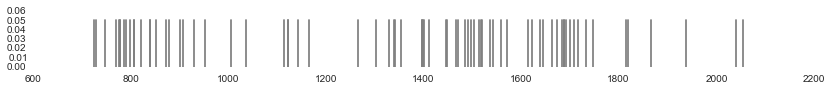

In [261]:
X = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]

# Plot
plt.figure(figsize=(14,1))
sns.rugplot(X, color='grey')
plt.show()

* How to choose `bin_min` and `bin_max` ?
* Whow to choose `bin_width` ?

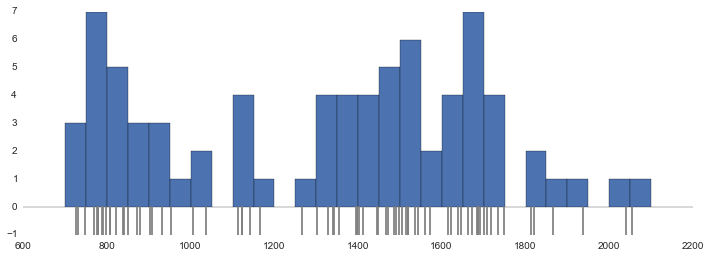

In [262]:
bin_min = 600
bin_max = 2200
bin_width = 50

bins = [ [i, i+bin_width] for i in range(bin_min, bin_max, bin_width) ]

hist(X,bins, width = bin_width)

sns.rugplot(X, color='grey', height=-1)
plt.show()

## Histograms with different bin width

Histogram with bin_width  10


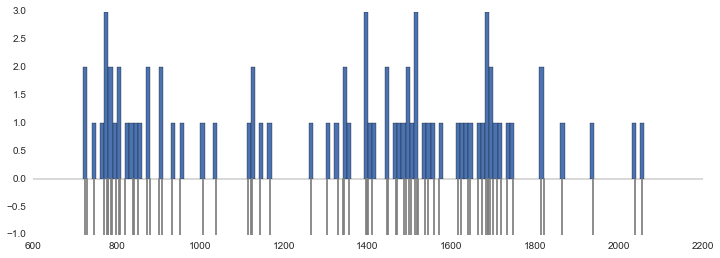

Histogram with bin_width  20


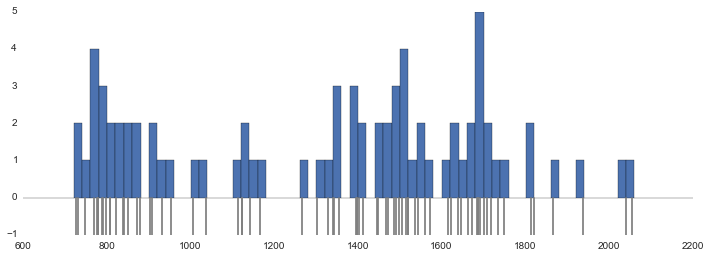

Histogram with bin_width  50


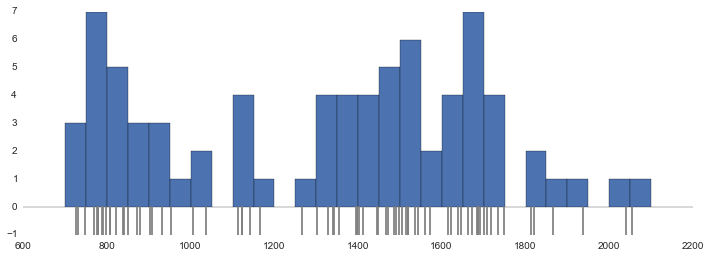

Histogram with bin_width  100


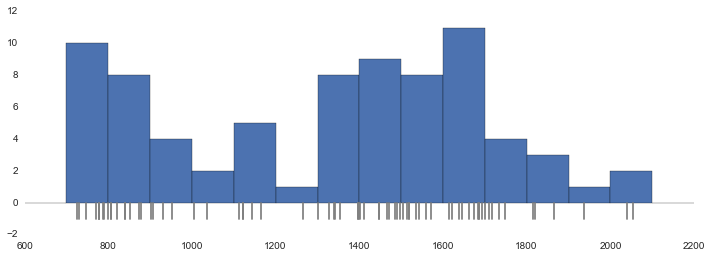

Histogram with bin_width  300


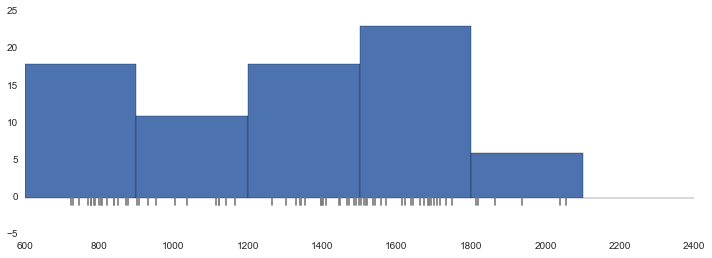

Histogram with bin_width  500


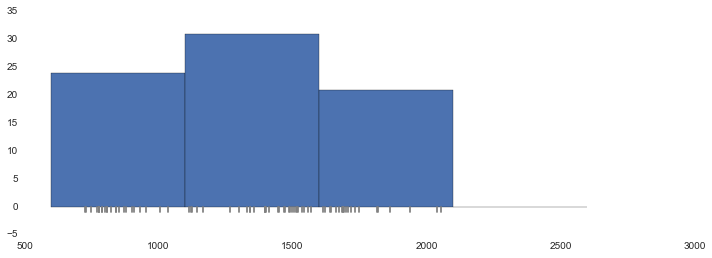

Histogram with bin_width  1000


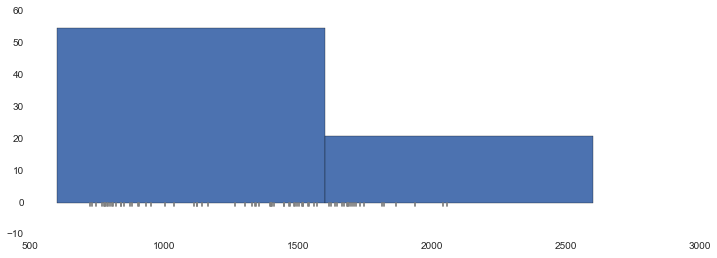

Histogram with bin_width  2000


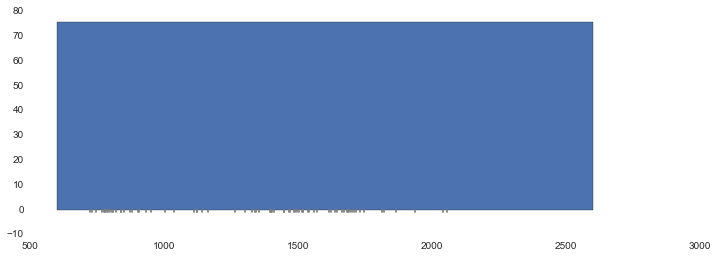

In [265]:
bin_min = 600
bin_max = 2200

def plot_hist(X,  bin_min, bin_max, bin_width):
    bins =[ [i, i+bin_width] for i in np.arange(bin_min, bin_max, bin_width) ]
    hist(X,bins,width=bin_width)
    sns.rugplot(X, color='grey', height=-1)
    print "Histogram with bin_width ", bin_width
    plt.show()

plot_hist(X, bin_min, bin_max, 10)
plot_hist(X, bin_min, bin_max, 20)
plot_hist(X, bin_min, bin_max, 50)
plot_hist(X, bin_min, bin_max, 100)
plot_hist(X, bin_min, bin_max, 300)
plot_hist(X, bin_min, bin_max, 500)
plot_hist(X, bin_min, bin_max, 1000)
plot_hist(X, bin_min, bin_max, 2000)

## Common bin-width choices

Remarks:
* Can convert `bin_count` and `bin_width` using relation $$ bin\_max - bin\_min = bin\_count \cdot bin\_width.$$

* Choices `bin_min=min(X)` and `bin_max=max(X)` are common.

Choices for bin-width:

* Excel: Let $n$ be the number of samples, then:

  $$ bin\_count = \sqrt{n} $$

* Scott's normal reference rule

  $$ bin\_width = \frac{3.5 \sigma}{n^{1/3}} $$

  where $\sigma$ is the standard deviation (cf. later).
  This is optimal for random samples of normally distributed data, in a certain sense.

* Freedman–Diaconis rule

  $$ bin\_width = \frac{2 IQR}{n^{1/3}} $$
  
  where IQR is the inter-quartile range (cf. later). Like Scott's rule but more robust agains outliers.

Excel rule
Histogram with bin_width  152.493649279


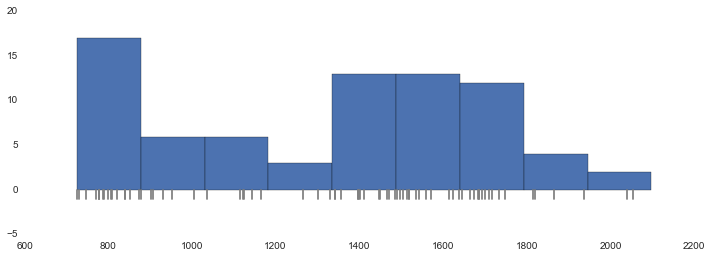

Scott's rule
Histogram with bin_width  309.50374768


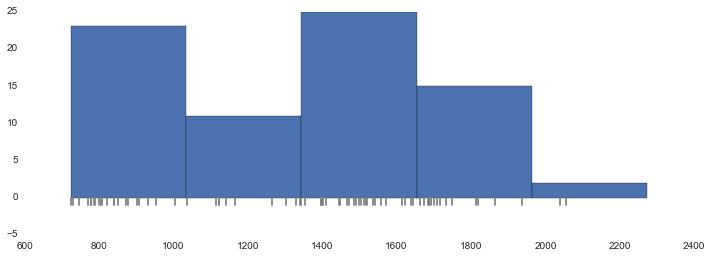

Freedman–Diaconis' rule
Histogram with bin_width  340.149900784


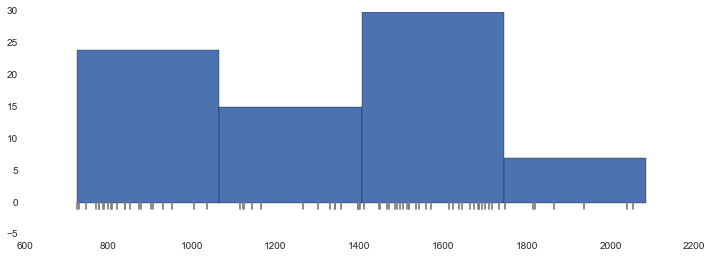

In [190]:
bin_min = min(X)
bin_max = max(X)

print "Excel rule"
plot_hist(X, bin_min, bin_max, (bin_max - bin_min)/math.pow(len(X),0.5))

print "Scott's rule"
plot_hist(X, bin_min, bin_max, 3.5 * np.std(X) / math.pow(len(X), 1./3))

print "Freedman–Diaconis' rule"
IQR = np.subtract(*np.percentile(X, [75, 25]))
plot_hist(X, bin_min, bin_max, 2 * IQR / math.pow(len(X), 1./3))

Histogram with bin_width  17.1


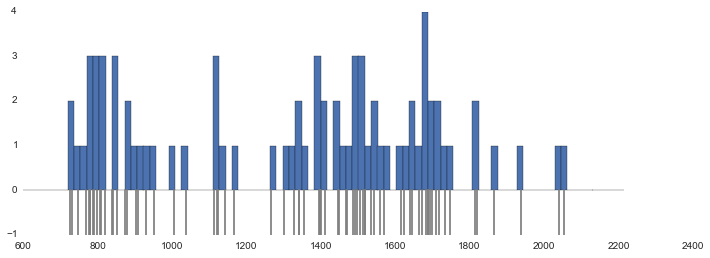

In [122]:
from IPython.display import display
from IPython.html.widgets import FloatSlider
from IPython.html.widgets import interactive

S = FloatSlider(value=10,min=10,max=300)
W = interactive(plot_hist, bin_width = S)
display(W)

# Non-equally spaced bin sizes

* Normailze by bin size when not using bins of equal size

* Log scale bins: E.g. bins for two significant digits

* Exercise: Upsample and Downsample Histograms


### Kernel Density Estimators

1. Replace 'rugs" with little functions (e.g. triangles, rectangles, normal-distributions)
2. Sum all functions

<center>
<img src="http://upload.wikimedia.org/wikipedia/en/4/41/Comparison_of_1D_histogram_and_KDE.png" width='400px'>

Source: Wikipdeia, CC BY-SA 3.0, by Drleft <br>
http://en.wikipedia.org/wiki/Kernel_density_estimation
</center>

Remarks:

* Smooth version of Histogram
* Better approximation for pdf (cf. later)
* More expensive to compute
* Harder to define
* Choices of function and width invloved. Similar to Histogram.


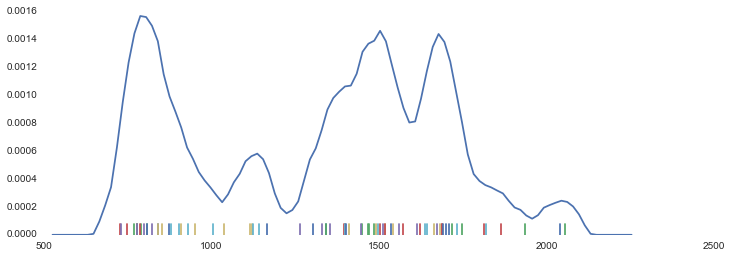

In [237]:
from sklearn.neighbors import KernelDensity

KDE=KernelDensity(kernel='epanechnikov', bandwidth=80)
KDE.fit(X[:,np.newaxis])
grid=np.linspace(min(X)-200, max(X)+200,100)
kde =np.exp(KDE.score_samples(grid[:,np.newaxis]))
plt.plot(grid, kde)
sns.rugplot(X)

# Summarizing unordered data

## Mean Values

The _mean value_ of $x_1, \dots, x_n$ is defined as

$$ \mu = mean(x_1, \dots, x_n) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative
 

mean= 1316.30863471


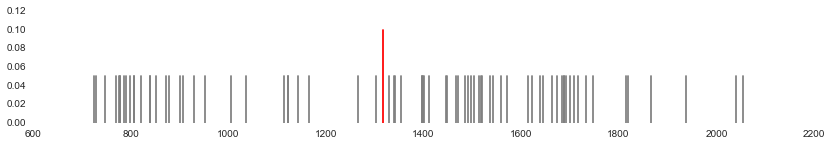

In [340]:
def mean(X):
    return float(sum(X)) / len(X)

X = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]
print "mean=", mean(X)

# Plot
def mark(m,height=0.1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color='grey')
    mark(mean(X))
    plt.show()

plot_mean(X)

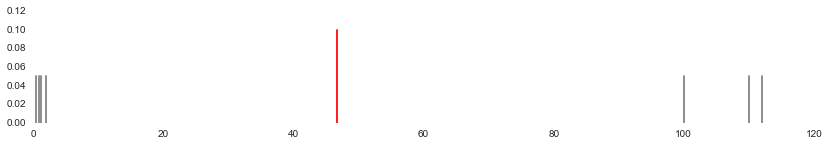

In [344]:
# Mean values can be atypical

plot_mean([1,2,0.4,1.2,100,110,112])

## Median

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \leq m \} = \# \{ i \,|\, x_i \geq m \} $$

A median can be computed as follows:

1. Let $S = sort(x_1, \dots, x_n)$, so that $s_1 \leq s_2 \leq \dots \leq s_n$.

2. If $n$ is odd then $m = s_{(n+1)/2}$ is the unique median.

3. If $n$ is odd, and $a = n/2$ and $b = n/2+1$ are the middle indices, then every number $m$ with 
  $$s_a \leq m \leq s_b$$
  is a median.
  
Remark:

* Median is not unique
* Not influenced by outliers (robust)

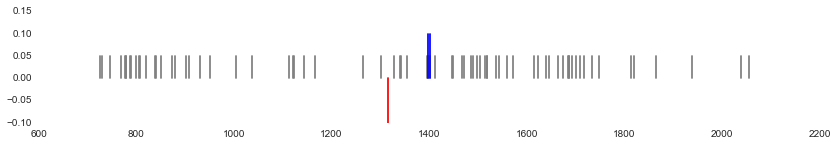

In [306]:
# Caution: Index start at 0 in python!
def median_min(X):
    S = sorted(X)
    n = len(X)
    if n % 2 == 0: 
        return S[n/2 - 1]
    else:
        return S[(n-1)/2]

def median_max(X):
    S = sorted(X)
    n = len(X)
    if n % 2 == 0: # even
        return S[n/2]
    else: # odd
        return S[(n-1)/2]

def plot_mean_med(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color='grey')
    mark(mean(X),-0.1, 'r')
    mark(median_max(X),0.1,'b')
    mark(median_min(X),0.1,'b')
    plt.show()

X = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]
plot_mean_med(X)

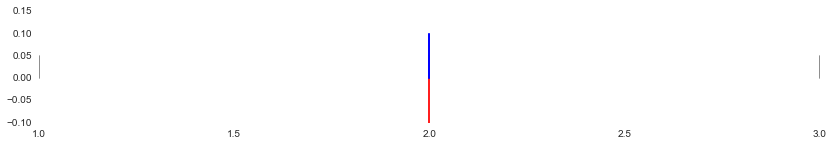

In [329]:
# odd case
plot_mean_med([1,2,3])

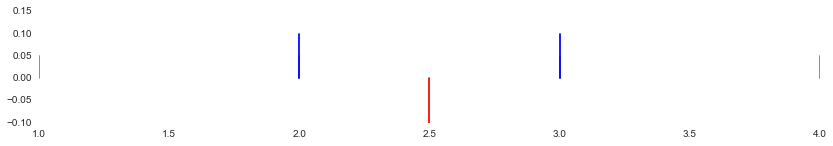

In [330]:
# even case
plot_mean_med([1,2,3,4])

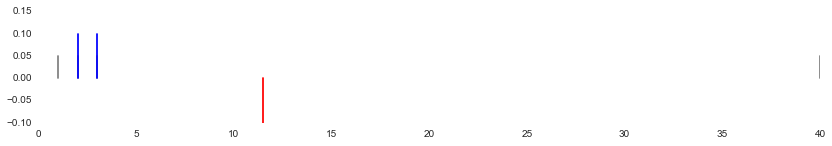

In [331]:
# With an outlier
plot_mean_med([1,2,3,40])

# Deviation Measures

1. The _maximal deviation_ is defined as
   $$ maxdev(x_1,\dots,x_n) = max \{ |x_i - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as
   $$ mad(x_1,\dots,x_n) = \frac{1}{n} \sum_{i=1}^n |x_i - \mu|.$$

3. The _standard deviation_ is defined as
   $$ \sigma = stddev(x_1,\dots,x_n) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}.$$


* Measure the 'typical' displacement from the mean value.
* Standard deviation popular because it has nice mathematical properties.

Maximal deviation


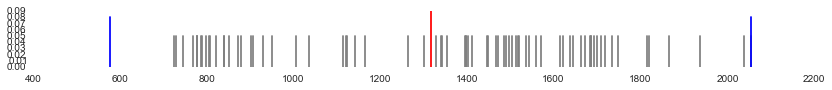

Mean Absolute Deviation


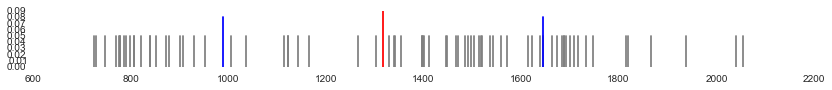

Standard Deviation


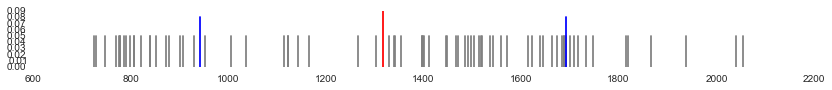

In [178]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

X = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]

def plot_mean_dev(X, m, s):
    plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey')
    plt.plot([m,m],[0,0.09],'r-' )
    plt.plot([m-s,m-s],[0,0.08],'b-')
    plt.plot([m+s,m+s],[0,0.08],'b-' )
    plt.show()
    
print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))


### Digression: p-deviations

$$ \sigma_p=dev_p(x_1,\dots,x_n) =  (\frac{1}{n} \sum_{i=1}^n |x_i - \mu|^p)^{1/p}, \quad 1 \leq p \leq \infty $$

* $\sigma_1$ is the mean absolute deviation
* So $\sigma_2 = \sigma$ stddev.
* $\sigma_\infty$ is the max-deviation

In [168]:
import math
def pdev(X, p=2):
    m = mean(X)
    return math.pow(sum( math.pow(abs(x - m),p) for x in X)/ len(X), 1./p) 


X = np.loadtxt("DataSets/trap-metrics.csv", delimiter=",")[:,1]
print "     mean_abs_dev =", mean_abs_dev(X)
for p in [1,1.5,2,3,5,10,100]:
    print "p = %3d      pdev = %.3f" % (p , pdev(X,p))
print "          max-dev =", max_dev(X)

     mean_abs_dev = 327.4656915
p =   1      pdev = 327.466
p =   1      pdev = 353.362
p =   2      pdev = 374.572
p =   3      pdev = 407.987
p =   5      pdev = 455.236
p =  10      pdev = 530.342
p = 100      pdev = 707.648
          max-dev = 738.072957089


# Quantiles / Percentiles

* Robust summary of distribution

* Quartiles for std-dev

* Non-unique. Choices http://en.wikipedia.org/wiki/Quantile#Estimating_the_quantiles_of_a_population

#  Boxplots and Whiskers

* http://en.wikipedia.org/wiki/Interquartile_range
* Median, q=0.5
* q=0.25
* q=0.75
* Outliers

all in one plot.

# PART II

Hands on Session

## Collecting Data

* System `/proc/`

## Data Formats

* JSON
* CSV

## Tools

* head, tail
* perl -pe
* csvkit
* feedgnuplot

* csv import to Excel, Python

## Exercises

* Plot CPU Utilization
* Compute median and quantiles for API latencies

# Part III: Probability Theory and Statistics

We have not talked about probability, yet!

**Def.**
A _discrete probability space_ is a discrete set $E$ together with a function $P(e) \in [0,1]$,
so that $$ \sum_{e \in E} P(e) = 1. $$

* $E$ can be possibly infinity, but at most countable (e.g. $E=\mathbb{N}$).
* We call $A \subset E$ events.
* Extend $P$ to sets $A \subset E$ by setting $P[A] = \sum_{e \in A} P(e)$.
* The condition can be restated as $P[E] = 1.$

Example:
* Even dice `E = [1,2,3,4,5,6]`, with $P(e) = 1/6$ for all $e \in E$.

## Sampling from a distribution

Given a probability space $E,P$ we can produce random samples, such that $e$ occures with probability $P(e)$.

* Hard to give precise meaning: independence
* Can construct random samples for every probability space from uniform samples in [0,1]
* Relative frequencies approach probabilities

FairDice:  [3, 3, 1, 5, 2, 1, 3, 1, 3, 2, 1, 5, 1, 1, 2, 4, 2, 1, 6, 4]


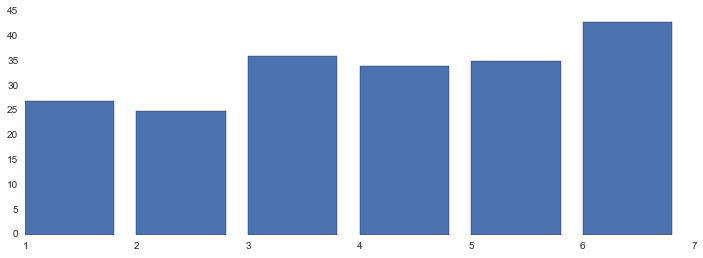

UnfairDice:  [6, 5, 6, 6, 3, 3, 6, 6, 2, 6, 6, 4, 1, 5, 6, 6, 5, 3, 6, 6]


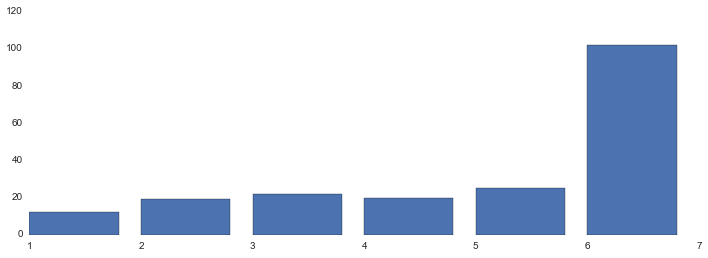

In [398]:
def sampler(E,P):
    return lambda: np.random.choice(E,p=P)

FairDice = sampler([1,2,3,4,5,6], [1./6]*6)

print "FairDice: ", [ FairDice() for x in range(20) ]

hist([ FairDice() for x in range(200) ], [[1,2],[2,3],[3,4],[4,5],[5,6],[6,7]])
plt.show()

UnfairDice = sampler([1,2,3,4,5,6], [0.1,0.1,0.1,0.1,0.1,0.5])

print "UnfairDice: ", [ UnfairDice() for x in range(20) ]

hist([ UnfairDice() for x in range(200) ], [[1,2],[2,3],[3,4],[4,5],[5,6],[6,7]])

## Example Distributions

* Bernoulli distribution
* Binomial distribution
* Poisson distribution

## Random Variables

* Image distribution

## Continues Probability Spaces

* Single events have probability 0
* Function only defined on sets / intervals as integral
* Probability density function
* Comulative densitiy function

Examples:

- Uniform distribution
- Normal distribution (Digression Gauß Integral Trick?)

## Parametric Models

* Families of distributions
* Likelihood of a parameter

* Example:
  - Bernoulli distribution -> Relative frequency
  - Normal Distribution -> Mean, Standard deviation

# Time Dependent Models


# Ressources

* Seaborn: statistical data visualization - http://stanford.edu/~mwaskom/software/seaborn/